# Project: EDA PUBG
## Table of Contents
<ul>
<li><a href="#Dictionary">Data Dictionary</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#model">Modeling </a></li>
</ul> 

In [1]:
# import the important libraries
import pandas as pd     # for dataframe
import numpy as np      # for arraies
import matplotlib.pyplot as plt  # for visualization 
%matplotlib inline
import seaborn as sns           # for visualization 

In [2]:
# read the data
df = pd.read_csv('train_V2.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


<a id='Dictionary'></a>
## Data Dictionary

- **groupId** - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **DBNOs** - Number of enemy players knocked.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- **kills** - Number of enemy players killed.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **numGroups** - Number of groups we have data for in the match.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

<a id='intro'></a>
## Introduction



- In this project what we want is analyzing the data and find out what affects the player's win by answering some questions such as:
    -  **Who are the highest win (Solos, Duos or Squads)?**
    -  **What is the impact of damage on the number of kills?**
    -  **What is affects of the player's win?**
    -  **What is the amount of work as a team between players?**


- **What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do you need to be the top shot? Let's let the data do the talking!**


<a id='wrangling'></a>
## Data Wrangling




**We can divide the data into two parts to see all the fetures**

In [13]:
df.iloc[:,:14].head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.00
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.00
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.00
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.00
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.44
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.00
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,0,0,0,0.00
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,0,0,0,0.00


In [14]:
df.iloc[:,14:].head(10)

,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1375,squad,28,27,1493,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,1930,squad,29,27,1349,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [9]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 4446966 non-null object
groupId            4446966 non-null object
matchId            4446966 non-null object
assists            4446966 non-null int64
boosts             4446966 non-null int64
damageDealt        4446966 non-null float64
DBNOs              4446966 non-null int64
headshotKills      4446966 non-null int64
heals              4446966 non-null int64
killPlace          4446966 non-null int64
killPoints         4446966 non-null int64
kills              4446966 non-null int64
killStreaks        4446966 non-null int64
longestKill        4446966 non-null float64
matchDuration      4446966 non-null int64
matchType          4446966 non-null object
maxPlace           4446966 non-null int64
numGroups          4446966 non-null int64
rankPoints         4446966 non-null int64
revives            4446966 non-null int64
rideDistance       4446966 non-null flo

In [15]:
# for knowing statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [23]:
df.winPlacePerc.value_counts().head()

0.0000    220505
1.0000    127573
0.5000     55065
0.3333     42508
0.6667     38112
Name: winPlacePerc, dtype: int64

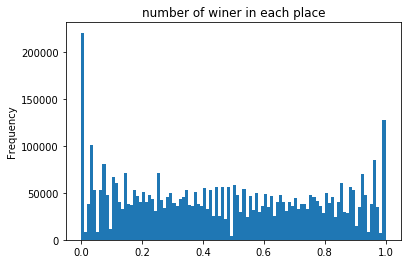

In [29]:
df.winPlacePerc.plot('hist',bins=100)
plt.title('number of winer in each place')
plt.show()

In [25]:
df.weaponsAcquired.value_counts().head()

2    768836
3    768347
4    689622
1    580951
5    540721
Name: weaponsAcquired, dtype: int64

**Detect unique data in columns**

In [16]:
df.nunique()

Id                 4446966
groupId            2026745
matchId              47965
assists                 20
boosts                  27
damageDealt          29916
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28284
matchDuration         1267
matchType               16
maxPlace               100
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33562
roadKills               14
swimDistance         28345
teamKills               11
vehicleDestroys          6
walkDistance         38599
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

In [18]:
# how many duplicats in the data
df.duplicated().sum()

0

**What has happened so far is an attempt to explore and understand the data further, and find out which problems are in it and need cleaning**

<a id='eda'></a>
## Exploratory Data Analysis


In [34]:
# firstly let's drop the nan in the winPlacePerc feture 
df.dropna(axis=0,inplace=True)

In [36]:
df.info(null_counts=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 4446965 non-null object
groupId            4446965 non-null object
matchId            4446965 non-null object
assists            4446965 non-null int64
boosts             4446965 non-null int64
damageDealt        4446965 non-null float64
DBNOs              4446965 non-null int64
headshotKills      4446965 non-null int64
heals              4446965 non-null int64
killPlace          4446965 non-null int64
killPoints         4446965 non-null int64
kills              4446965 non-null int64
killStreaks        4446965 non-null int64
longestKill        4446965 non-null float64
matchDuration      4446965 non-null int64
matchType          4446965 non-null object
maxPlace           4446965 non-null int64
numGroups          4446965 non-null int64
rankPoints         4446965 non-null int64
revives            4446965 non-null int64
rideDistance       4446965 non-null flo

### now we are ready to Explor!

# Who are the highest win (Solos, Duos or Squads)?

In [38]:
df.matchType.value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [52]:
df.matchType.value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

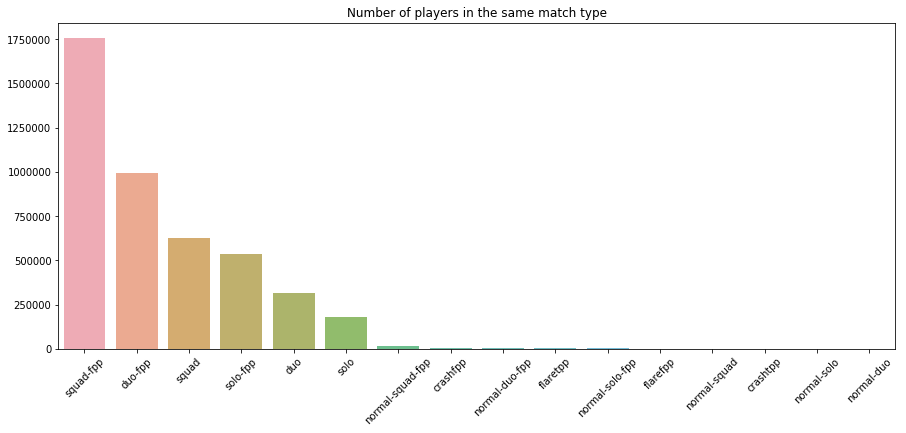

In [55]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
ax = sns.barplot(df.matchType.value_counts().index, df.matchType.value_counts().values, alpha=0.8)
ax.set_title("Number of players in the same match type")
plt.show()

### now we will make it only 3 types [solo,duo,squad]

In [76]:
df.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'squad',inplace=True)

In [79]:
df.matchType.replace(['duo-fpp','normal-duo-fpp','normal-duo'],'duo',inplace=True)

In [80]:
df.matchType.replace(['solo-fpp','normal-solo-fpp','normal-solo'],'solo',inplace=True)

In [82]:
df.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'others',inplace=True)

In [83]:
df.matchType.value_counts()

squad     2400402
duo       1315970
solo       720712
others       9881
Name: matchType, dtype: int64

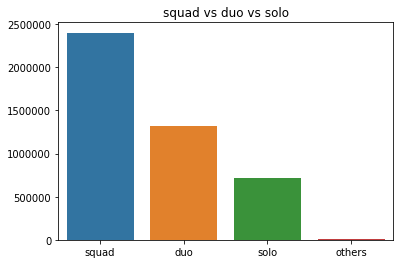

In [86]:
sns.barplot(df.matchType.value_counts().index, df.matchType.value_counts().values)
plt.title('squad vs duo vs solo')
plt.show()

**we can say that more than 50% of players play as a (squad)**

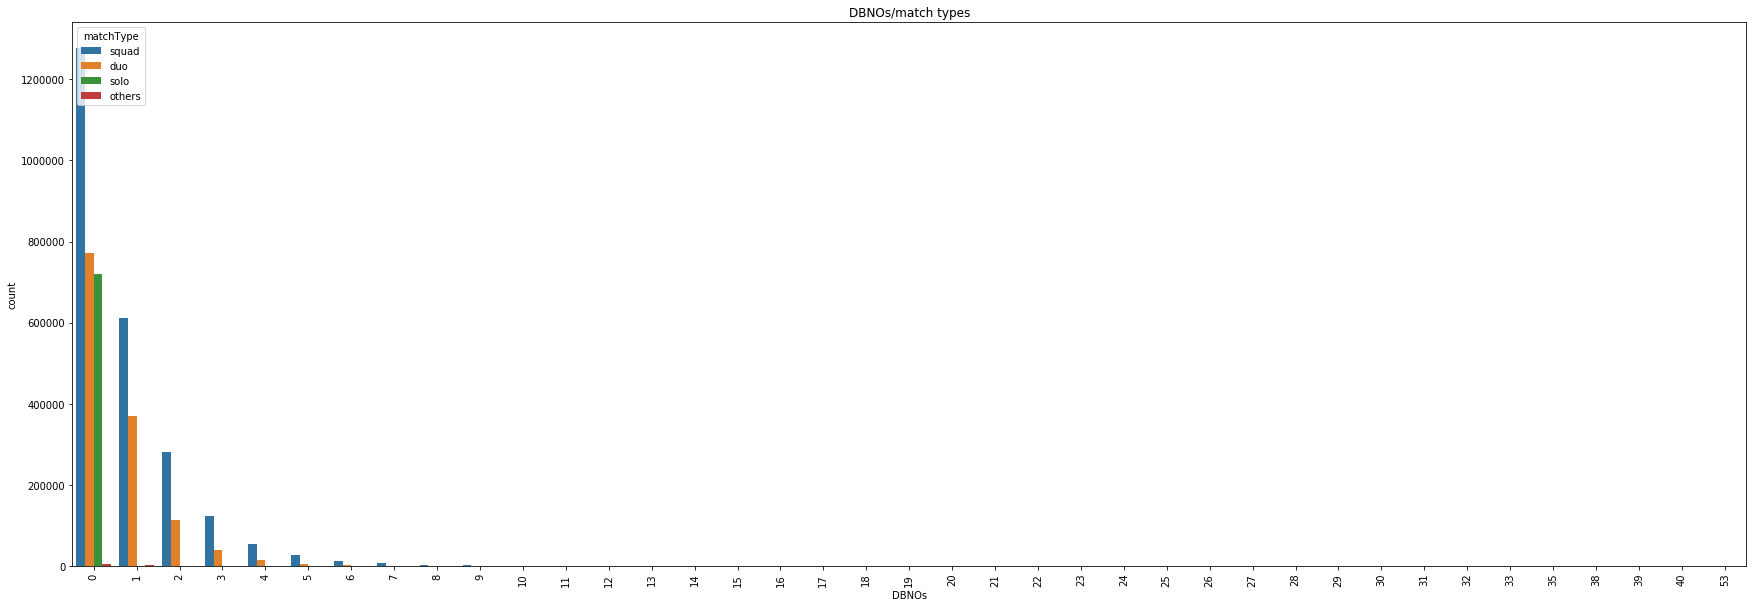

In [113]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.countplot(df.DBNOs,hue=df.matchType)
plt.title("DBNOs/match types")
plt.show()

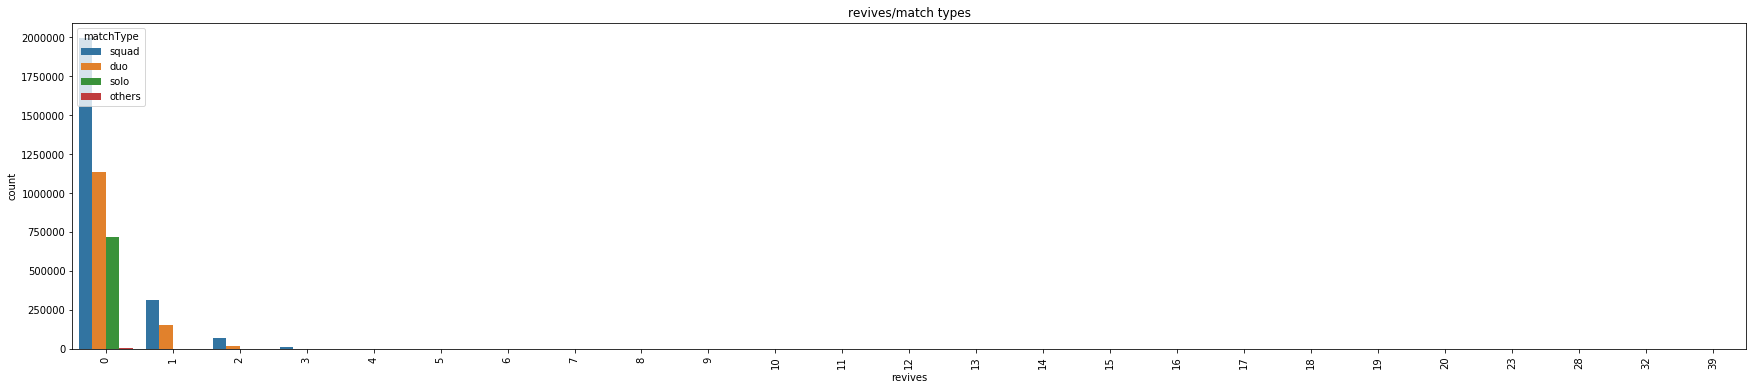

In [112]:
plt.figure(figsize=(30,6))
plt.xticks(rotation=90)
sns.countplot(df.revives,hue=df.matchType)
plt.title("revives/match types")
plt.show()

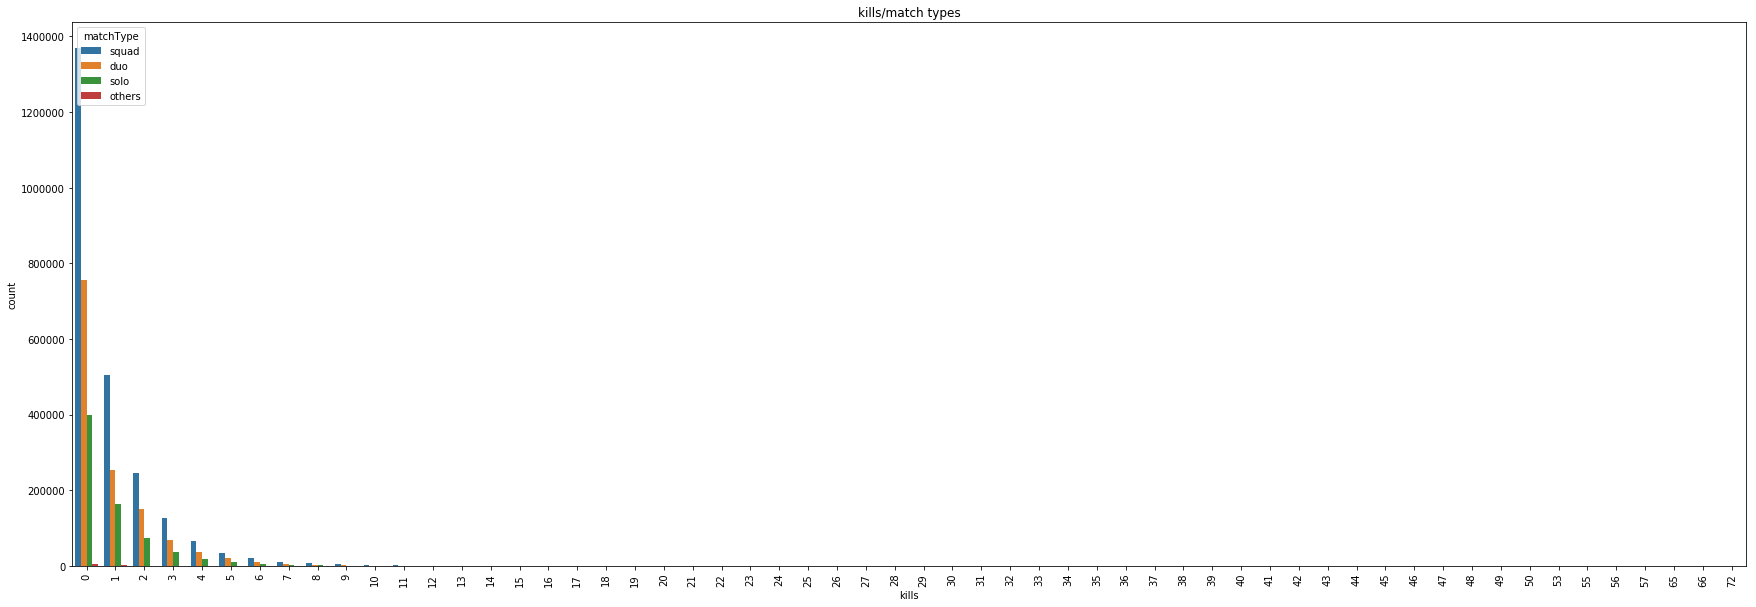

In [111]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.countplot(df.kills,hue=df.matchType)
plt.title("kills/match types")
plt.show()

**so working as a team give you the chance to revived or make more damage and kills**

# let's work on a war

# What is the impact of damage on the number of kills?

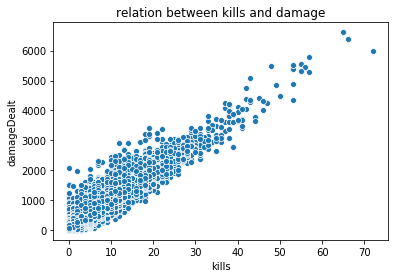

In [118]:
sns.scatterplot(df.kills,df.damageDealt)
plt.title('relation between kills and damage')
plt.show()

In [127]:
kills = df[['headshotKills','killPlace','killPoints','kills'
            ,'killStreaks','longestKill','roadKills','teamKills'
            ,'weaponsAcquired','winPlacePerc']]

In [128]:
kills.head()

,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,roadKills,teamKills,weaponsAcquired,winPlacePerc
0,0,60,1241,0,0,0.00,0,0,1,0.4444
1,0,57,0,0,0,0.00,0,0,5,0.6400
2,0,47,0,0,0,0.00,0,0,2,0.7755
3,0,75,0,0,0,0.00,0,0,3,0.1667
4,0,45,0,1,1,58.53,0,0,2,0.1875


In [129]:
kills.nunique()

headshotKills         34
killPlace            101
killPoints          1707
kills                 58
killStreaks           18
longestKill        28284
roadKills             14
teamKills             11
weaponsAcquired       97
winPlacePerc        3000
dtype: int64

In [149]:
kills_features = ['headshotKills','killPlace','killPoints','kills'
                  ,'killStreaks','longestKill','roadKills','teamKills','weaponsAcquired']
def scatter (feature_name):
        sns.scatterplot(x=feature_name,y='winPlacePerc',data=kills)

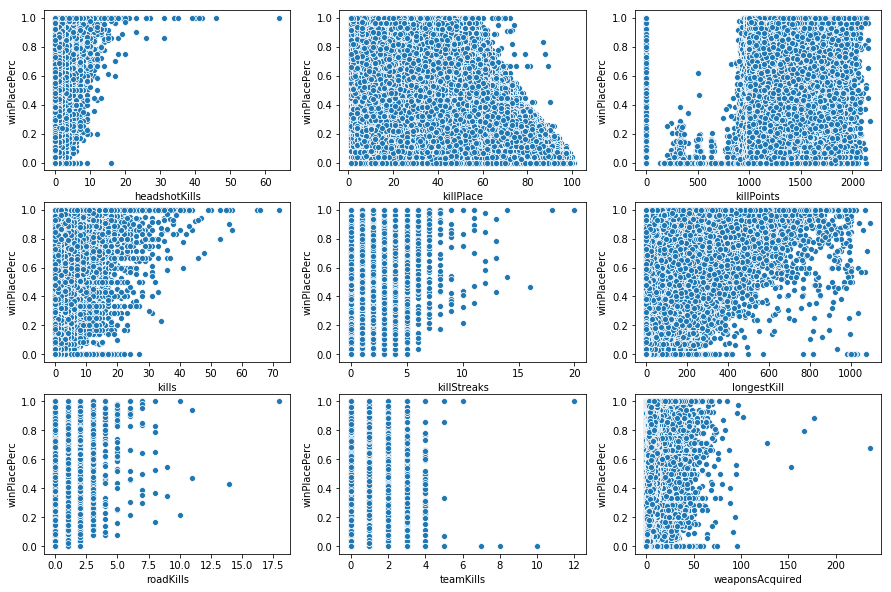

In [152]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
scatter(kills_features[0])
plt.subplot(3,3,2)
scatter(kills_features[1])
plt.subplot(3,3,3)
scatter(kills_features[2])
plt.subplot(3,3,4)
scatter(kills_features[3])
plt.subplot(3,3,5)
scatter(kills_features[4])
plt.subplot(3,3,6)
scatter(kills_features[5])
plt.subplot(3,3,7)
scatter(kills_features[6])
plt.subplot(3,3,8)
scatter(kills_features[7])
plt.subplot(3,3,9)
scatter(kills_features[8])
plt.show()

## let's see the correlation

In [161]:
kills.corr()

,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,roadKills,teamKills,weaponsAcquired,winPlacePerc
headshotKills,1.000000,-0.469829,0.023988,0.674275,0.512882,0.447261,0.013369,0.008658,0.217552,0.277722
killPlace,-0.469829,1.000000,-0.023278,-0.730499,-0.810517,-0.541146,-0.057356,-0.037797,-0.490144,-0.719069
killPoints,0.023988,-0.023278,1.000000,0.036192,0.037091,0.014084,-0.004156,-0.039739,-0.003978,0.012908
kills,0.674275,-0.730499,0.036192,1.000000,0.802500,0.602936,0.063651,0.017601,0.336414,0.419916
killStreaks,0.512882,-0.810517,0.037091,0.802500,1.000000,0.515097,0.065575,0.027612,0.275373,0.377566
longestKill,0.447261,-0.541146,0.014084,0.602936,0.515097,1.000000,0.025214,0.007604,0.276264,0.410154
roadKills,0.013369,-0.057356,-0.004156,0.063651,0.065575,0.025214,1.000000,0.009684,0.016494,0.034544
teamKills,0.008658,-0.037797,-0.039739,0.017601,0.027612,0.007604,0.009684,1.000000,0.035918,0.015943
weaponsAcquired,0.217552,-0.490144,-0.003978,0.336414,0.275373,0.276264,0.016494,0.035918,1.000000,0.583806
winPlacePerc,0.277722,-0.719069,0.012908,0.419916,0.377566,0.410154,0.034544,0.015943,0.583806,1.000000


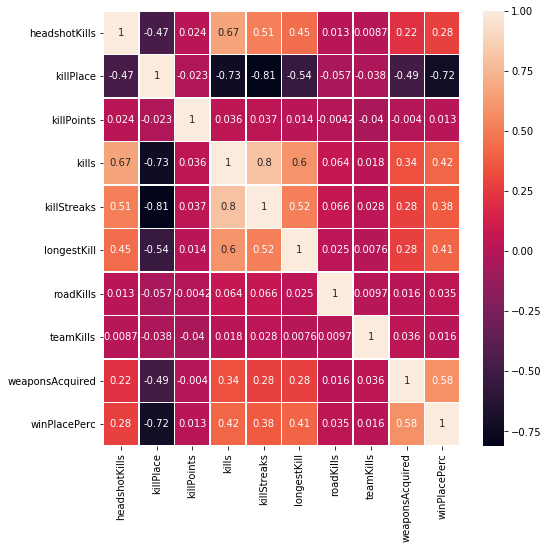

In [155]:
plt.figure(figsize=(8,8))
sns.heatmap(kills.corr(), annot=True, linewidths=.5)

### Now we can say that the more weapons you carry, and the more kills you have killed, the greater your chance of getting an advanced center.

### Notice that the more dead your enemy kills. Much lower your chance of getting the top position

# Mobility in the match

- Running
- Swimming
- Driving

In [166]:
mobility=df[['rideDistance','roadKills','swimDistance','vehicleDestroys','walkDistance','winPlacePerc']]

In [168]:
mobility.head()

,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,winPlacePerc
0,0.0000,0,0.00,0,244.80,0.4444
1,0.0045,0,11.04,0,1434.00,0.6400
2,0.0000,0,0.00,0,161.80,0.7755
3,0.0000,0,0.00,0,202.70,0.1667
4,0.0000,0,0.00,0,49.75,0.1875


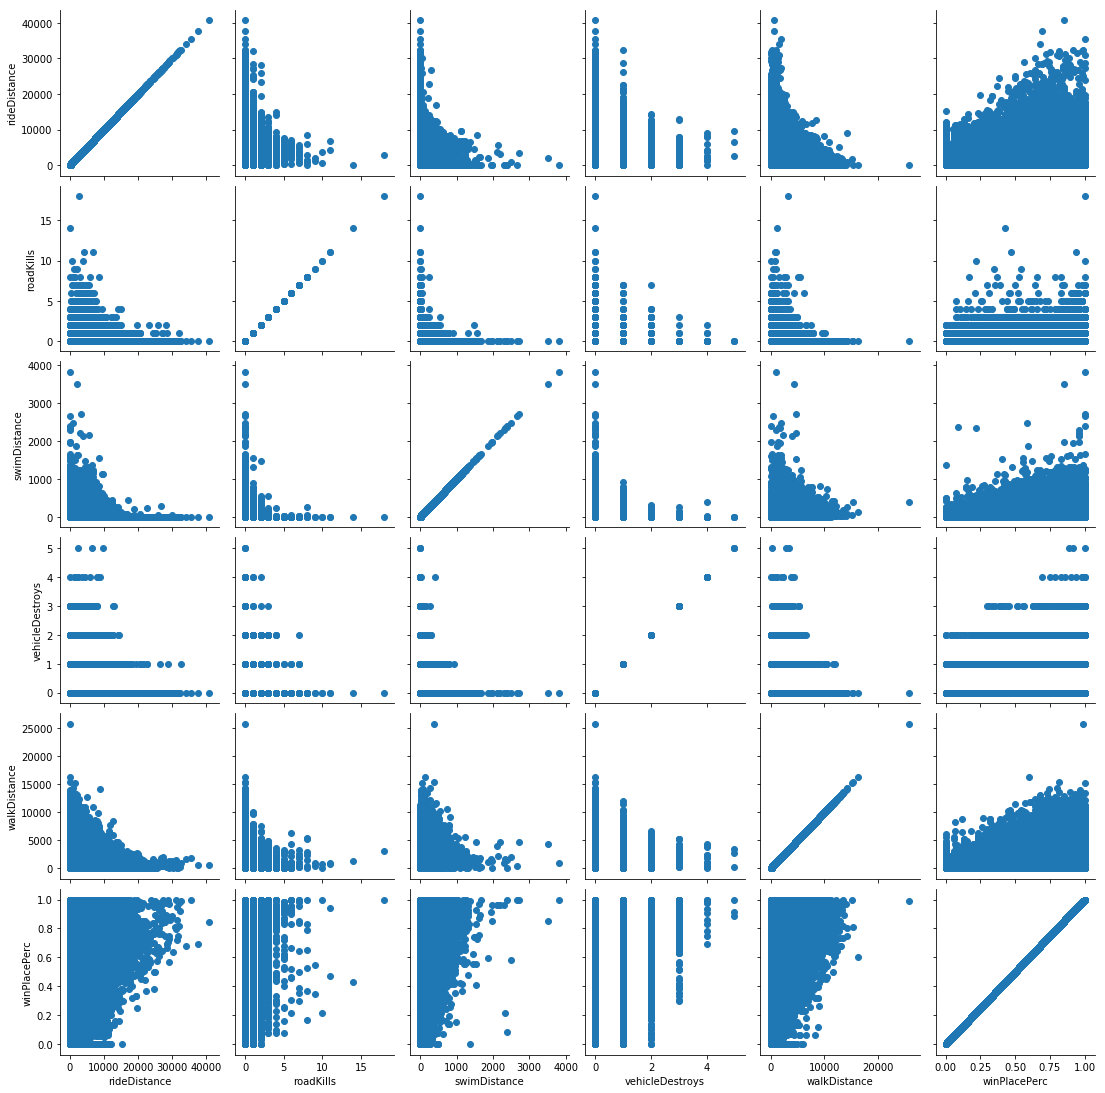

In [170]:
# Then you map to the grid
g = sns.PairGrid(mobility)
g.map(plt.scatter)

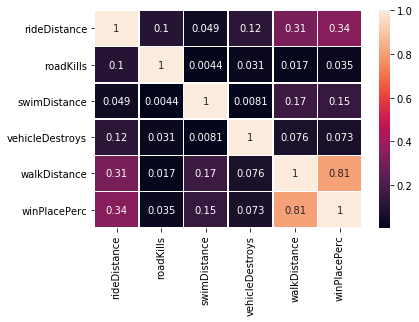

In [172]:
sns.heatmap(mobility.corr(),annot=True, linewidths=.5)

**We can see that all these features have positive relationships with a  , but I struggled is that there is a very strong positive relationship between the distance that the player walks and win place Followed Ride distance**

 <a id='conclusions'></a>
# Conclusions

**After analyzing and understanding the data is time to answer a question:**
# What's the best strategy to win in PUBG?

### Whenever you played in a team increased your chance to win and find aid to have other opportunities, In addition to increasing the number of killers you kill them , Taking into account that if the competitor kills more than you, you are an exhibition of loss so you must develop your skills in murder from distances and focus when shooting on the head, Must move so much until they do not give an opportunity to hit you and always try to collect weapons and find vehicles

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<a id='model'></a>
# Modeling  
**it's time to build a model that predicts the win place for players**

## Table of Contents
<ul>
<li><a href="#feature">Feature Selection </a></li>
<li><a href="#prepro">Data Preprocessing</a></li>
<li><a href="#Train">Select and Train the Model</a></li>
</ul> 

In [3]:
data_train = df.copy()

<a id='feature'></a>
# Feature Selection

In [7]:
data_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


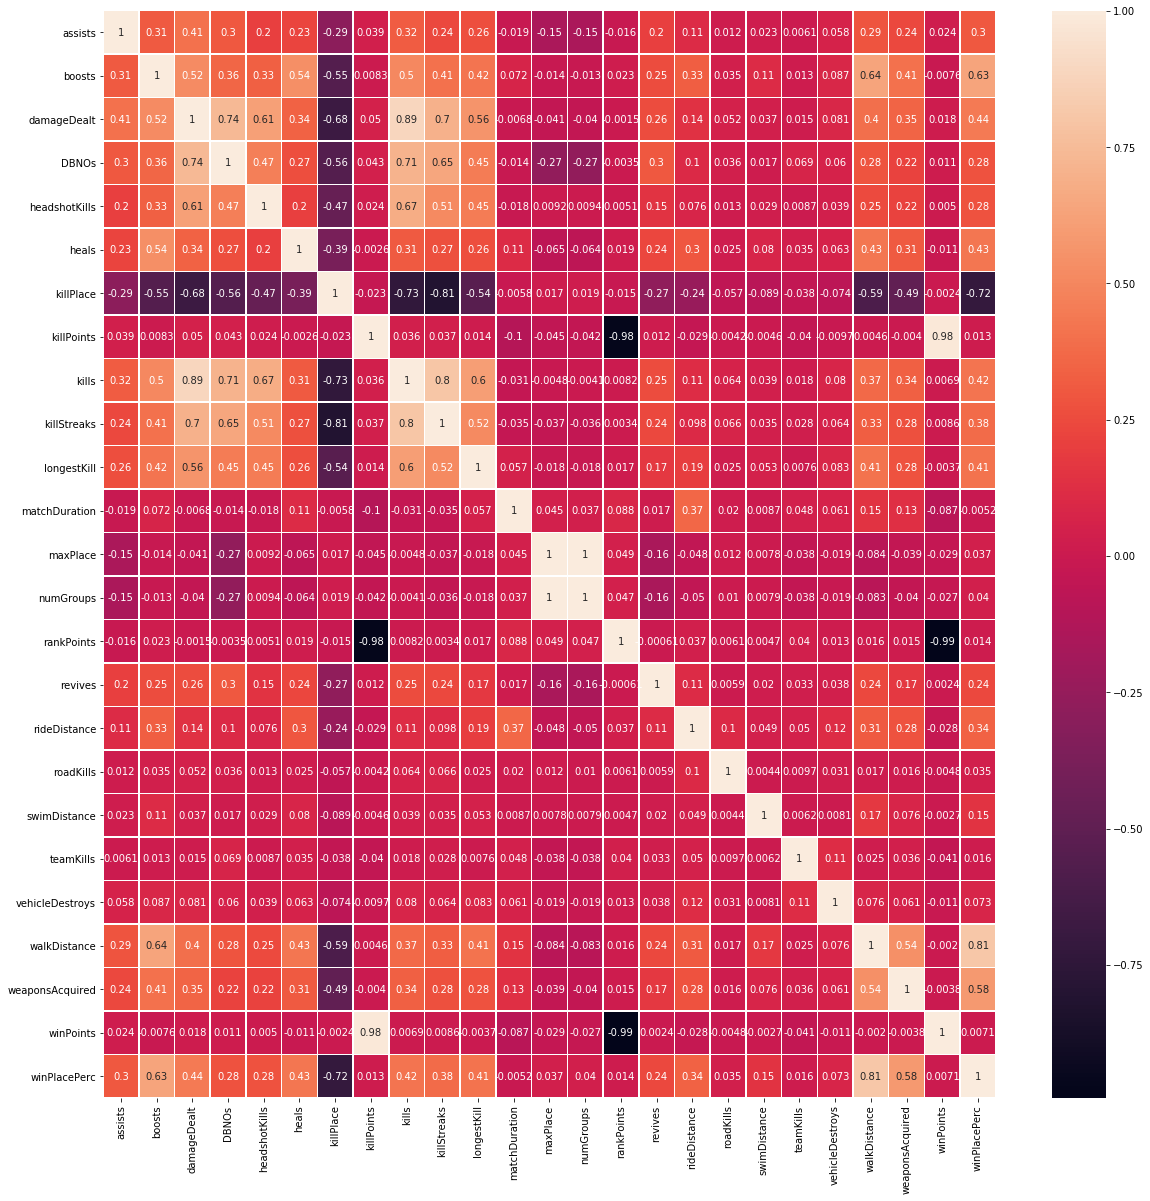

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(),annot=True, linewidths=.5)

**We can see that there are features between them, very strong relationships**

**there are some features Because there is a strong relationship between them and other variables, or because they do not affect winning** 
### [killPoints,matchDuration,maxPlace,numGroups,rankPoints,roadKills,teamKills,winPoints,killStreaks,longestKill,killPoints]

In [31]:
f_data_train=data_train.drop(['Id','groupId','matchId','killPoints','matchDuration','maxPlace',
                 'numGroups','rankPoints','roadKills','teamKills'
                 ,'winPoints','killStreaks','longestKill','killPoints'],axis=1)

In [32]:
f_data_train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,matchType,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,squad,0,0.0000,0.00,0,244.80,1,0.4444
1,0,0,91.47,0,0,0,57,0,squad,0,0.0045,11.04,0,1434.00,5,0.6400
2,1,0,68.00,0,0,0,47,0,duo,0,0.0000,0.00,0,161.80,2,0.7755
3,0,0,32.90,0,0,0,75,0,squad,0,0.0000,0.00,0,202.70,3,0.1667
4,0,0,100.00,0,0,0,45,1,solo,0,0.0000,0.00,0,49.75,2,0.1875


<a id='prepro'></a>
# Data Preprocessing

**let's make a pipelines to automate our work**

In [33]:
f_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 16 columns):
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
kills              int64
matchType          object
revives            int64
rideDistance       float64
swimDistance       float64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPlacePerc       float64
dtypes: float64(5), int64(10), object(1)
memory usage: 576.8+ MB


In [93]:
X= f_data_train.drop('winPlacePerc',axis=1)
X.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,matchType,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired
0,0,0,0.00,0,0,0,60,0,squad,0,0.0000,0.00,0,244.80,1
1,0,0,91.47,0,0,0,57,0,squad,0,0.0045,11.04,0,1434.00,5
2,1,0,68.00,0,0,0,47,0,duo,0,0.0000,0.00,0,161.80,2
3,0,0,32.90,0,0,0,75,0,squad,0,0.0000,0.00,0,202.70,3
4,0,0,100.00,0,0,0,45,1,solo,0,0.0000,0.00,0,49.75,2


In [109]:
y= data_train[['winPlacePerc']]
y.head()

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875


In [94]:
num_data = X.drop('matchType',axis=1)

In [95]:
num_data.shape

(4446965, 14)

In [96]:
cat_data = f_data_train['matchType']

In [97]:
cat_data = pd.DataFrame(cat_data)

## standardize numerical data

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

data_num_tr = num_pipeline.fit_transform(num_data)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [99]:
data_num_tr= pd.DataFrame(data_num_tr,columns=num_data.columns)
data_num_tr.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.37668,-0.511252,0.451541,-0.593402,-0.34873,-0.404524,-0.147836,-0.085499,-0.768416,-1.083021
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.37668,-0.511252,0.342303,-0.593402,-0.34873,-0.404521,0.214105,-0.085499,0.236403,0.545283
2,1.301767,-0.645129,-0.367238,-0.574191,-0.37668,-0.511252,-0.021824,-0.593402,-0.34873,-0.404524,-0.147836,-0.085499,-0.838547,-0.675945
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.37668,-0.511252,0.997732,-0.593402,-0.34873,-0.404524,-0.147836,-0.085499,-0.803989,-0.268869
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.37668,-0.511252,-0.094650,0.048264,-0.34873,-0.404524,-0.147836,-0.085499,-0.933224,-0.675945


### Encod Categorical feature 

In [100]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(cat_data)
data_cat_1hot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [101]:
cat_encoder.categories_

[array(['duo', 'others', 'solo', 'squad'], dtype=object)]

Now let's build a pipeline for preprocessing all attributes:

In [102]:
from sklearn.compose import ColumnTransformer

num_attribs = list(num_data)
cat_attribs = ["matchType"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(f_data_train)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [103]:
data_prepared=pd.DataFrame(data_prepared)

In [107]:
data_prepared.drop(17,axis=1,inplace=True)

### What we did is we made pipelines to make the work easier and turned the numerical data and categorical data to be ready for the model

<a id='Train'></a>

# Select and Train the Model

In [112]:
X = data_prepared.copy()

In [115]:
y.head()

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875


In [117]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [118]:
param = {
    'eta': 0.15, 
    'max_depth': 5,  
    'num_class': 2} 

steps = 20  # The number of training iterations
model = xgb.train(param, D_train, steps)

In [119]:
from sklearn.metrics import mean_squared_error

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("MSE = {}".format(mean_squared_error(Y_test, best_preds)))

MSE = 0.31803941921560036


# Apply on  Test data

In [121]:
test_data = pd.read_csv('test_V2.csv')

In [122]:
test_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [124]:
list(f_data_train.columns)

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'kills',
 'matchType',
 'revives',
 'rideDistance',
 'swimDistance',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPlacePerc']

In [148]:
test_set = test_data[['assists','boosts','damageDealt','DBNOs','headshotKills',
 'heals','killPlace','kills','matchType','revives','rideDistance',
 'swimDistance','vehicleDestroys','walkDistance','weaponsAcquired']]

In [167]:
test_set.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'squad',inplace=True)
test_set.matchType.replace(['duo-fpp','normal-duo-fpp','normal-duo'],'duo',inplace=True)
test_set.matchType.replace(['solo-fpp','normal-solo-fpp','normal-solo'],'solo',inplace=True)
test_set.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'others',inplace=True)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [168]:
test_set.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,matchType,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired
0,0,0,51.46,0,0,0,73,0,squad,0,0.0,0.0,0,588.0,1
1,0,4,179.10,0,0,2,11,2,duo,2,4669.0,0.0,0,2017.0,6
2,1,0,23.40,0,0,4,49,0,squad,0,0.0,0.0,0,787.8,4
3,0,0,65.52,0,0,0,54,0,duo,0,0.0,0.0,0,1812.0,3
4,0,4,330.20,1,2,1,7,3,squad,1,0.0,0.0,0,2963.0,4


In [173]:
test_model = full_pipeline.fit_transform(test_set)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [171]:
test_model

array([[-0.39743463, -0.64438223, -0.46752236, ...,  0.        ,
         0.        ,  1.        ],
       [-0.39743463,  1.68957536,  0.29479396, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33089952, -0.64438223, -0.63510773, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.39743463, -0.64438223, -0.22564042, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.33089952,  0.52259656,  0.05291202, ...,  0.        ,
         0.        ,  0.        ],
       [-0.39743463, -0.64438223, -0.65660835, ...,  0.        ,
         0.        ,  1.        ]])

In [174]:
test_model = pd.DataFrame(test_model)

In [175]:
test_model.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.397435,-0.644382,-0.467522,-0.577010,-0.380549,-0.509436,0.917096,-0.602691,-0.348157,-0.400698,-0.148872,-0.083947,-0.475776,-1.113838,0.0,0.0,0.0,1.0
1,-0.397435,1.689575,0.294794,-0.577010,-0.380549,0.240838,-1.340508,0.709851,3.923213,2.764944,-0.148872,-0.083947,0.735581,1.005667,1.0,0.0,0.0,0.0
2,1.330900,-0.644382,-0.635108,-0.577010,-0.380549,0.991112,0.043185,-0.602691,-0.348157,-0.400698,-0.148872,-0.083947,-0.306407,0.157865,0.0,0.0,0.0,1.0
3,-0.397435,-0.644382,-0.383551,-0.577010,-0.380549,-0.509436,0.225250,-0.602691,-0.348157,-0.400698,-0.148872,-0.083947,0.561804,-0.266036,1.0,0.0,0.0,0.0
4,-0.397435,1.689575,1.197223,0.305066,2.989906,-0.134299,-1.486160,1.366122,1.787528,-0.400698,-0.148872,-0.083947,1.537502,0.157865,0.0,0.0,0.0,1.0


In [176]:
test_model.drop(17,axis=1,inplace=True)

# Training The models

In [184]:
# X is dependant features
# y independant label
# test model for prediction

In [189]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.37668,-0.511252,0.451541,-0.593402,-0.34873,-0.404524,-0.147836,-0.085499,-0.768416,-1.083021,0.0,0.0,0.0
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.37668,-0.511252,0.342303,-0.593402,-0.34873,-0.404521,0.214105,-0.085499,0.236403,0.545283,0.0,0.0,0.0
2,1.301767,-0.645129,-0.367238,-0.574191,-0.37668,-0.511252,-0.021824,-0.593402,-0.34873,-0.404524,-0.147836,-0.085499,-0.838547,-0.675945,1.0,0.0,0.0
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.37668,-0.511252,0.997732,-0.593402,-0.34873,-0.404524,-0.147836,-0.085499,-0.803989,-0.268869,0.0,0.0,0.0
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.37668,-0.511252,-0.094650,0.048264,-0.34873,-0.404524,-0.147836,-0.085499,-0.933224,-0.675945,0.0,0.0,1.0


In [188]:
y.head()

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875


In [190]:
test_model.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.397435,-0.644382,-0.467522,-0.577010,-0.380549,-0.509436,0.917096,-0.602691,-0.348157,-0.400698,-0.148872,-0.083947,-0.475776,-1.113838,0.0,0.0,0.0
1,-0.397435,1.689575,0.294794,-0.577010,-0.380549,0.240838,-1.340508,0.709851,3.923213,2.764944,-0.148872,-0.083947,0.735581,1.005667,1.0,0.0,0.0
2,1.330900,-0.644382,-0.635108,-0.577010,-0.380549,0.991112,0.043185,-0.602691,-0.348157,-0.400698,-0.148872,-0.083947,-0.306407,0.157865,0.0,0.0,0.0
3,-0.397435,-0.644382,-0.383551,-0.577010,-0.380549,-0.509436,0.225250,-0.602691,-0.348157,-0.400698,-0.148872,-0.083947,0.561804,-0.266036,1.0,0.0,0.0
4,-0.397435,1.689575,1.197223,0.305066,2.989906,-0.134299,-1.486160,1.366122,1.787528,-0.400698,-0.148872,-0.083947,1.537502,0.157865,0.0,0.0,0.0


In [192]:
X.to_csv('independant_feture_train.csv')
y.to_csv('dependant_feture_train.csv')
test_model.to_csv('test_model.csv')

In [2]:
X = pd.read_csv('independant_feture_train.csv',)
y = pd.read_csv('dependant_feture_train.csv')
test_model = pd.read_csv('test_model.csv')

In [10]:
X.drop('Unnamed: 0',axis=1,inplace=True)
y.drop('Unnamed: 0',axis=1,inplace=True)
test_model.drop('Unnamed: 0',axis=1,inplace=True)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
from sklearn.metrics import mean_absolute_error
forest_predictions = forest_reg.predict(X_test)
forest_mae = mean_absolute_error(y_test, forest_predictions)
forest_mae

0.07440942649506029

# xgboost

In [66]:
'''
for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                   
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
'''

"\nfor tuning parameters\nparameters_for_testing = {\n    'colsample_bytree':[0.4,0.6,0.8],\n    'gamma':[0,0.03,0.1,0.3],\n    'min_child_weight':[1.5,6,10],\n    'learning_rate':[0.1,0.07],\n    'max_depth':[3,5],\n    'n_estimators':[10000],\n    'reg_alpha':[1e-5, 1e-2,  0.75],\n    'reg_lambda':[1e-5, 1e-2, 0.45],\n    'subsample':[0.6,0.95]  \n}\n\n                   \nxgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,\n     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)\n\ngsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')\ngsearch1.fit(train_x,train_y)\nprint (gsearch1.grid_scores_)\nprint('best params')\nprint (gsearch1.best_params_)\nprint('best score')\nprint (gsearch1.best_score_)\n"

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [63]:
import xgboost 

xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.07, max_delta_step=0, max_depth=3,
       min_child_weight=1.5, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=42, reg_alpha=0.75,
       reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
xgb_pred = xgb_model.predict(X_test)

In [65]:
mean_absolute_error(y_test, xgb_pred)

0.07062897738140733

In [71]:
test_pred = xgb_model.predict(test_model)

In [68]:
submit = pd.read_csv('sample_submission_V2.csv')

In [72]:
submit.winPlacePerc = test_pred

In [75]:
submit.to_csv('xgboost_prediction.csv')

# SGD

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)

In [45]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_train, y_train)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [46]:
sgd_pred=sgd_reg.predict(X_test)

In [47]:
sqd_mae = mean_absolute_error(y_test,sgd_pred)

In [48]:
sqd_mae

0.10643398127596576

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [51]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
lm_pred = lm.predict(X_test)

In [53]:
mean_absolute_error(y_test,lm_pred)

0.10530327990547655

# so let's fine tune our model to se the best parameter